# Problem Statement 2:

In this problem, we'll explore the yield-to-maturity. Create a coupon bond, can be anything, but try a reasonable coupon rate, maybe 6% and a medium maturity, like 5 years. Use the YTM method of the bond object to investigate the behavior of the yield-to-maturity. Start by finding the yield-to-maturity if the bond were trading at par. Compare the result to the coupon rate you specified. Are you surprised by what you find? (Warning: computing the yield-to-maturity involves some root finding, so there will be a bit of numerical error). Now, perturb the price and see how the yield-to-maturity responds. Try both premium and discount bonds. Consider the relationships you are discovering in light of what you have understood from problem #1.

In [1]:
import fixedincome as fi
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### Part 1: Effect of Market price on Bond on Yields

In [2]:
bond1 = fi.create_coupon_bond(maturity=5.0, face=10000, rate=6, frequency=2)

In [3]:
ytm1 = bond1.YTM(8000)
ytm2 = bond1.YTM(9000)
ytm3 = bond1.YTM(10000)
ytm4 = bond1.YTM(11000)
ytm5 = bond1.YTM(12000)

In [4]:
ytm_list = [ytm1, ytm2, ytm3, ytm4, ytm5]
prices = [8000, 9000, 10000, 11000, 12000]

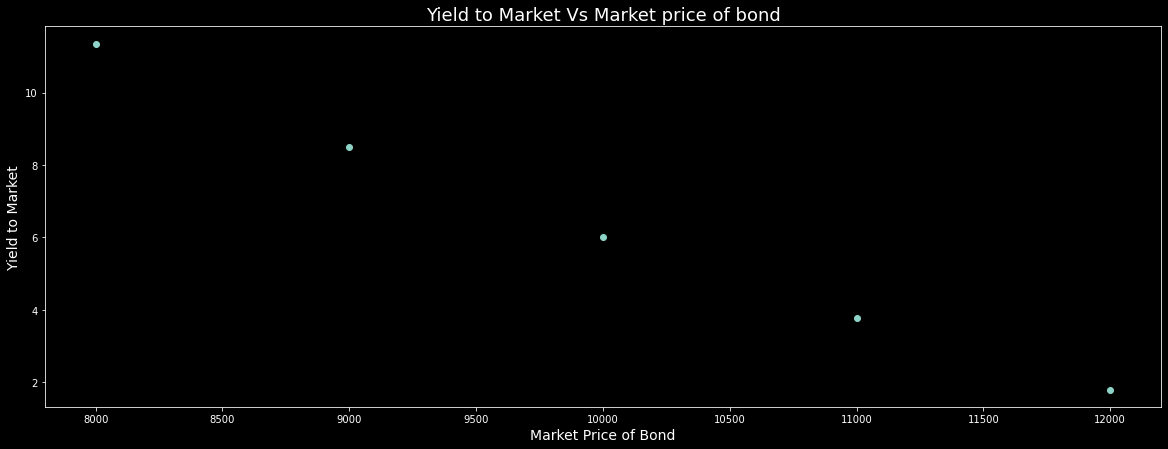

In [5]:
plt.figure(figsize=(20,7))
plt.scatter(prices, ytm_list)
plt.xlabel("Market Price of Bond", fontsize=14)
plt.ylabel("Yield to Market", fontsize=14)
plt.title("Yield to Market Vs Market price of bond", fontsize=18)
plt.show()

__Comments:__ This is another example of the inverse relationship between prices and interest rates. Recall that the yield-to-maturity is that constant discount rate such that the given bond would have the asserted price. Or, more fundamentally, the higher the market bond price, the smaller must be the rate at which the coupons are being discounted, hence the inverse relationship depicted in the plot.

### Part 2: Effect of Maturity on Yields

In [6]:
bond2 = fi.create_coupon_bond(maturity=6, face=10000, rate=6, frequency=2)
bond3 = fi.create_coupon_bond(maturity=8, face=10000, rate=6, frequency=2)
bond4 = fi.create_coupon_bond(maturity=10, face=10000, rate=6, frequency=2)
bond5 = fi.create_coupon_bond(maturity=15, face=10000, rate=6, frequency=2)
bond6 = fi.create_coupon_bond(maturity=20, face=10000, rate=6, frequency=2)
bonds = [bond1, bond2, bond3, bond4, bond5, bond6]

In [7]:
ytm_list = [[], [], [], [], [], []]

In [8]:
for i in range(6):
    for j in range(5):
        ytm = bonds[i].YTM(prices[j])
        ytm_list[i].append(ytm)

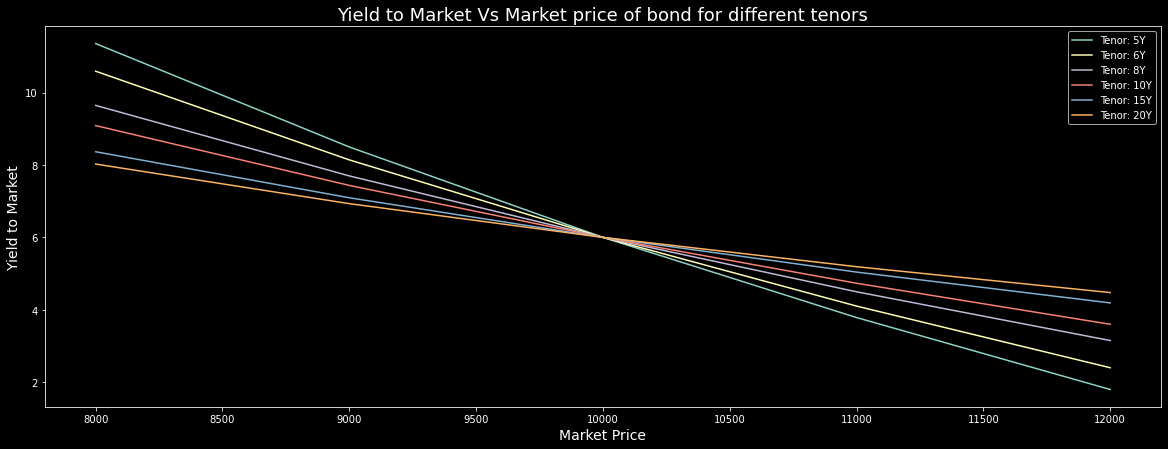

In [9]:
plt.figure(figsize=(20,7))
plt.plot(prices, ytm_list[0], label='Tenor: 5Y')
plt.plot(prices, ytm_list[1], label='Tenor: 6Y')
plt.plot(prices, ytm_list[2], label='Tenor: 8Y')
plt.plot(prices, ytm_list[3], label='Tenor: 10Y')
plt.plot(prices, ytm_list[4], label='Tenor: 15Y')
plt.plot(prices, ytm_list[5], label='Tenor: 20Y')
plt.xlabel("Market Price", fontsize=14)
plt.ylabel("Yield to Market", fontsize=14)
plt.title("Yield to Market Vs Market price of bond for different tenors", fontsize=18)
plt.legend()
plt.show()

__Comments:__ This plot exhibits the inverse of the greater sensitivity of prices to changes in rates for longer maturity bonds. The converse of that observation is that for higher maturity bonds, a given change in the price implies a smaller change in the yield-to-maturity.

### Part 3: Effect of Coupon Rate on Yields

In [10]:
bond11 = bond1
bond12 = fi.create_coupon_bond(maturity=5.0, face=10000, rate=8, frequency=2)
bond13 = fi.create_coupon_bond(maturity=5.0, face=10000, rate=10, frequency=2)
bond14 = fi.create_coupon_bond(maturity=5.0, face=10000, rate=15, frequency=2)
bond15 = fi.create_coupon_bond(maturity=5.0, face=10000, rate=20, frequency=2)
bond16 = fi.create_coupon_bond(maturity=5.0, face=10000, rate=30, frequency=2)
bonds = [bond11, bond12, bond13, bond14, bond15, bond16]

In [11]:
ytm_list = [[], [], [], [], [], []]

In [12]:
for i in range(6):
    for j in range(5):
        ytm = bonds[i].YTM(prices[j])
        ytm_list[i].append(ytm)

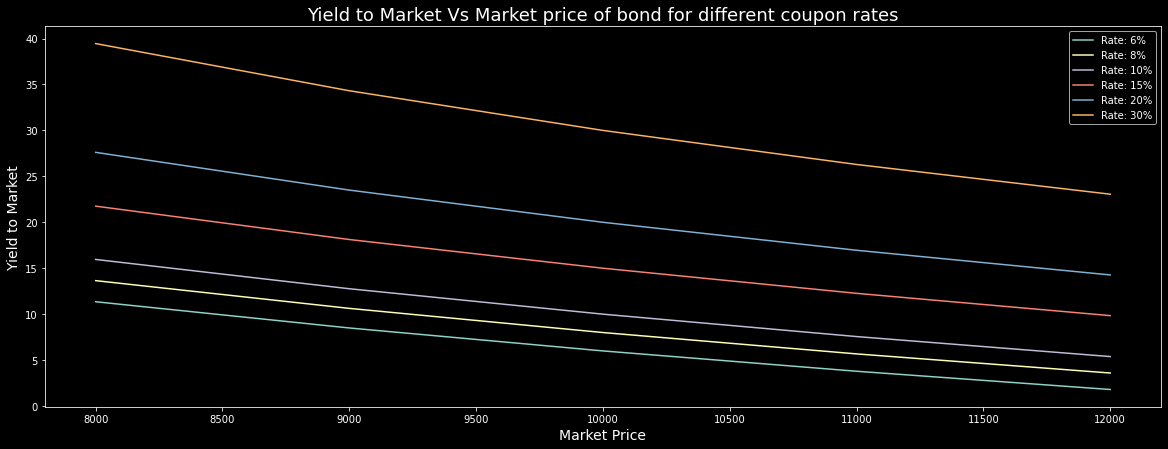

In [13]:
plt.figure(figsize=(20,7))
plt.plot(prices, ytm_list[0], label='Rate: 6%')
plt.plot(prices, ytm_list[1], label='Rate: 8%')
plt.plot(prices, ytm_list[2], label='Rate: 10%')
plt.plot(prices, ytm_list[3], label='Rate: 15%')
plt.plot(prices, ytm_list[4], label='Rate: 20%')
plt.plot(prices, ytm_list[5], label='Rate: 30%')
plt.xlabel("Market Price", fontsize=14)
plt.ylabel("Yield to Market", fontsize=14)
plt.title("Yield to Market Vs Market price of bond for different coupon rates", fontsize=18)
plt.legend()
plt.show()

__Comments:__ This graph represents the inverse of the relationships from the corresponding plot from problem (1). The larger the coupon rate, the higher must be the discounting to bring the bond down to
a given price level.